In [3]:
import pandas as pd
import torch
from torch import nn
import gensim
from gensim.models import KeyedVectors
import sklearn
import torchmetrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df3 = pd.read_csv('main_dataset.csv',  encoding='UTF-8')
df3.head()

,id,text,label
0,1,на работе был полный пиддес :| и так каждое за...,0.0
1,2,"Коллеги сидят рубятся в Urban terror, а я из-з...",1.0
2,3,@elina_4post как говорят обещаного три года жд...,0.0
3,4,"Желаю хорошего полёта и удачной посадки,я буду...",0.0
4,5,"Обновил за каким-то лешим surf, теперь не рабо...",0.0


In [5]:
df3.tail()

,id,text,label
15870,15871,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
15871,15872,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
15872,15873,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
15873,15874,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0
15874,15875,До сих пор пересматриваю его видео. Орамбо кст...,0.0


In [6]:
df3.isna().sum()

id       0
text     0
label    0
dtype: int64

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(df3['text'].apply(type).value_counts())

<class 'str'>    15875
Name: text, dtype: int64


In [9]:
!pip install stop-words


In [10]:
import stop_words
#stop_words_russian = set(stopwords.words('russian'))
stop_words_russian = stop_words.get_stop_words('russian')

In [11]:
# Convert non-string values to empty string
df3['text'] = df3['text'].apply(lambda x: str(x) if type(x) != str else x)

# Remove stop words from the text column
df3['text'] = df3['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_russian]))

In [12]:
df3.head(15)

,id,text,label
0,1,"работе полный пиддес :| закрытие месяца, свихн...",0.0
1,2,"Коллеги сидят рубятся Urban terror, из-за долб...",1.0
2,3,@elina_4post говорят обещаного ждут...((,0.0
3,4,"Желаю хорошего полёта удачной посадки,я сильно...",0.0
4,5,"Обновил каким-то лешим surf, работает простопл...",0.0
5,6,"Котёнка вчера носик разбила, плакала расстраив...",0.0
6,7,"@juliamayko @O_nika55 @and_Possum Зашли, затих...",0.0
7,8,вообще болею - выздоравливаю :(,0.0
8,9,микрофраза :( учимся срать кирпичами режиме &a...,1.0
9,10,"хочу помириться , сука гордая сделаю! (((",1.0


In [13]:
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
# Apply the function to the 'text' column of the DataFrame
df3['text'] = df3['text'].apply(remove_urls)

In [14]:
df3.tail(20)

,id,text,label
15855,15856,"ТАСС, 21 марта. Премьер-министр Новой Зеландии...",0.0
15856,15857,"вой подсоса гомофорсера Что, говно, неприятно ...",1.0
15857,15858,Шлюха. парад шлюх.,1.0
15858,15859,дебил-куколд Значение знаешь?,1.0
15859,15860,"хуею сосачеры, большиство прыщавые жиртресты р...",1.0
15860,15861,Что-то появившееся небе пугает туристов расска...,1.0
15861,15862,Моча анимаче решила окончательно убить реакшен...,1.0
15862,15863,65 мало? гражданина рейтинг 90 3 дня записи ви...,0.0
15863,15864,"зря, вас, хохлов, свиньями кличут. грязные жив...",1.0
15864,15865,прямо сразу ватан бросился своему кредитному н...,1.0


In [15]:
import string

In [16]:
# Define a function to remove punctuation and extra spaces from a text string
def remove_punct_and_extra_space(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra space
    text = re.sub(' +', ' ', text)
    return text

# Apply the function to the 'text' column of the DataFrame
df3['text'] = df3['text'].apply(remove_punct_and_extra_space)

In [17]:
df3.tail(15)

,id,text,label
15860,15861,Чтото появившееся небе пугает туристов рассказ...,1.0
15861,15862,Моча анимаче решила окончательно убить реакшен...,1.0
15862,15863,65 мало гражданина рейтинг 90 3 дня записи видео,0.0
15863,15864,зря вас хохлов свиньями кличут грязные животны...,1.0
15864,15865,прямо сразу ватан бросился своему кредитному н...,1.0
15865,15866,ЭЙ МИХАЛЫЧ ПОЖАРКА ПИЩИТ ХУЙ ПУЩАЙ ПИЩИТ СМОРИ...,1.0
15866,15867,Пусть евровидение стримит Долбоеб чтоли послед...,1.0
15867,15868,ЖЕНЩИНА ВЕНЕЦ ТВОРЕНИЯ помните ваньки стоите ж...,1.0
15868,15869,авиакомпании вместе специалистами гугл карт см...,1.0
15869,15870,запад прошел хуйню пару сотен назад Большинств...,0.0


In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [19]:
#df3['text'] = df3['text'].apply(lambda x: nltk.word_tokenize(x))

In [20]:
df3.head()

,id,text,label
0,1,работе полный пиддес закрытие месяца свихнусь D,0.0
1,2,Коллеги сидят рубятся Urban terror изза долбан...,1.0
2,3,elina4post говорят обещаного ждут,0.0
3,4,Желаю хорошего полёта удачной посадкия сильно ...,0.0
4,5,Обновил какимто лешим surf работает простоплеер,0.0


In [21]:
!pip install pymorphy2

In [22]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
from nltk.corpus import stopwords

In [23]:
import re
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) >= 1:
        return tokens
    return None
df3['text'] = df3.text.apply(lemmatize)
df3.iloc[19:24]

,id,text,label
19,20,"[какойтый, нехороший, телефон, наушник, опозна...",0.0
20,21,"[думаюна, мой, век, почта, россия, подняться, ...",0.0
21,22,"[один, напоминать, дом, путин, делать, реалити...",0.0
22,23,"[ебааааа, модуль, региональный, экономика]",1.0
23,24,"[оооууа, анфолловить, чувак]",0.0


In [24]:
df3.to_csv('df3_after_preprocessing.csv', index=False)

In [25]:
after = pd.read_csv('df3_after_preprocessing.csv',  encoding='UTF-8')
after.head()

,id,text,label
0,1,"['работа', 'полный', 'пиддес', 'закрытие', 'ме...",0.0
1,2,"['коллега', 'сидеть', 'рубиться', 'изз', 'долб...",1.0
2,3,"['говорить', 'обещаной', 'ждать']",0.0
3,4,"['желать', 'хороший', 'полёт', 'удачный', 'пос...",0.0
4,5,"['обновить', 'какимтый', 'леший', 'работать', ...",0.0


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
after = after.dropna(subset=['text'])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_df, test_df = train_test_split(after, test_size=0.3, random_state=42)

In [30]:
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix


#Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

#Преобразование текстов в матрицу TF-IDF
tfidf_matrix_train_df = vectorizer.fit_transform(train_df['text'])

#Преобразование разреженной матрицы в формат CSR
tfidf_csr_train_df = csr_matrix(tfidf_matrix_train_df)

# Преобразование формата разреженной матрицы в формат COO
tfidf_coo_train_df = tfidf_csr_train_df.tocoo().astype(np.float32)

# Преобразование матрицы TF-IDF в разреженный тензор PyTorch
tfidf_tensor_train_df = torch.sparse.FloatTensor(torch.LongTensor([tfidf_coo_train_df.row.tolist(), tfidf_coo_train_df.col.tolist()]),
                                        torch.FloatTensor(tfidf_coo_train_df.data))

# Вывод тензора TF-IDF
print(tfidf_tensor_train_df)

tensor(indices=tensor([[ 1436,  4096,  8861,  ...,  3527,  5959,  8516],
                       [    0,     0,     0,  ..., 28928, 28929, 28930]]),
       values=tensor([0.3869, 0.1987, 0.2847,  ..., 0.2246, 0.4808, 0.4946]),
       size=(11100, 28931), nnz=142217, layout=torch.sparse_coo)


In [31]:
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

#Удаление строк с пропущенными значениями в столбце 'text'
after = after.dropna(subset=['text'])

#Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

#Преобразование текстов в матрицу TF-IDF
tfidf_matrix_test_df = vectorizer.fit_transform(test_df['text'])

#Преобразование разреженной матрицы в формат CSR
tfidf_csr_test_df = csr_matrix(tfidf_matrix_test_df)

# Преобразование формата разреженной матрицы в формат COO
tfidf_coo_test_df = tfidf_csr_test_df.tocoo().astype(np.float32)

# Преобразование матрицы TF-IDF в разреженный тензор PyTorch
tfidf_tensor_test_df = torch.sparse.FloatTensor(torch.LongTensor([tfidf_coo_test_df.row.tolist(), tfidf_coo_test_df.col.tolist()]),
                                        torch.FloatTensor(tfidf_coo_test_df.data))

# Вывод тензора TF-IDF
print(tfidf_tensor_test_df)

tensor(indices=tensor([[ 1136,  3495,   501,  ...,  3200,  4169,  4602],
                       [    0,     1,     2,  ..., 17697, 17697, 17698]]),
       values=tensor([0.2026, 0.4030, 0.5778,  ..., 0.3787, 0.0669, 0.2085]),
       size=(4758, 17699), nnz=62353, layout=torch.sparse_coo)


In [48]:
x_train = tfidf_tensor_train_df
x_test = tfidf_tensor_test_df 

In [49]:
y_train_list=list()
for i in train_df['label']:
    y_train_list.append(i)
y_train=torch.tensor(y_train_list)
y_train.unsqueeze_(1)

tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])

In [50]:
y_test_list=list()
for i in test_df['label']:
    y_test_list.append(i)
y_test=torch.tensor(y_test_list)
y_test.unsqueeze_(1)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])

In [51]:
from torch import nn
import gensim
from gensim.models import KeyedVectors
import sklearn
import torchmetrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [52]:
!pip install torchmetrics

In [55]:
x_train = x_train.to_dense()
x_test = x_test.to_dense()
x_train = x_train.narrow(1, 0, 1000) 
x_test = x_test.narrow(1, 0, 1000) 

In [56]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [57]:
Mk1=MLP(1000,300,1)

In [58]:
if torch.cuda.is_available():
    dev = torch.device("cuda:0")
else:
    dev = torch.device("cpu")

In [59]:
x_train=x_train.to(dev)
x_test=x_test.to(dev)
y_train=y_train.to(dev)
y_test=y_test.to(dev)

In [60]:
Mk1=Mk1.to(dev)

In [61]:

optimizer = torch.optim.Adam(Mk1.parameters(), lr=0.001)
loss = nn.BCEWithLogitsLoss()
f1_score = torchmetrics.functional.f1_score
accuracy = torchmetrics.functional.accuracy
diagdf=pd.DataFrame(columns=['Epoch','loss','F1-score','accuracy'])
for epoch in range(10000):
    optimizer.zero_grad()
    pred = Mk1.forward(x_train.float())
    l = loss(pred, y_train) # squeeze the predicted tensor
    l.backward()
    f1= f1_score(pred, y_train, task='binary')
    acc=accuracy(pred, y_train, task='binary')
    data={'Epoch':epoch,'loss':l.item(),'F1-score':f1.item(),'accuracy':acc.item()}
    diagdf = pd.concat([diagdf, pd.DataFrame(data, index=[epoch])], ignore_index=True)
    optimizer.step()
    print('Epoch: ', epoch+1, ', Loss: ', l.item(),'  f1-score:', f1.item(),"  accuracy:", acc.item())

Epoch:  1 , Loss:  0.8075559735298157   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  2 , Loss:  0.8069536685943604   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  3 , Loss:  0.8063455820083618   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  4 , Loss:  0.8057333827018738   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  5 , Loss:  0.805118978023529   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  6 , Loss:  0.8044964075088501   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  7 , Loss:  0.8038661479949951   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  8 , Loss:  0.8032246232032776   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  9 , Loss:  0.8025661706924438   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  10 , Loss:  0.8018954396247864   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  11 , Loss:  0.8012088537216187   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  12 , Loss:  0.8005052208900452   f1-score: 0.0   accurac

Epoch:  113 , Loss:  0.6983781456947327   f1-score: 0.013004605658352375   accuracy: 0.6718018054962158
Epoch:  114 , Loss:  0.6981457471847534   f1-score: 0.013542795553803444   accuracy: 0.6718918681144714
Epoch:  115 , Loss:  0.697921872138977   f1-score: 0.013542795553803444   accuracy: 0.6718918681144714
Epoch:  116 , Loss:  0.6977044939994812   f1-score: 0.014080693013966084   accuracy: 0.6719819903373718
Epoch:  117 , Loss:  0.6974924802780151   f1-score: 0.014080693013966084   accuracy: 0.6719819903373718
Epoch:  118 , Loss:  0.6972864270210266   f1-score: 0.014618299901485443   accuracy: 0.6720720529556274
Epoch:  119 , Loss:  0.697085976600647   f1-score: 0.015155615285038948   accuracy: 0.6721621751785278
Epoch:  120 , Loss:  0.6968916654586792   f1-score: 0.016765819862484932   accuracy: 0.6724324226379395
Epoch:  121 , Loss:  0.6967018842697144   f1-score: 0.01783783733844757   accuracy: 0.6726126074790955
Epoch:  122 , Loss:  0.6965161561965942   f1-score: 0.0194436945021

Epoch:  223 , Loss:  0.6861535310745239   f1-score: 0.15342190861701965   accuracy: 0.6957657933235168
Epoch:  224 , Loss:  0.686088502407074   f1-score: 0.1543472856283188   accuracy: 0.6959459185600281
Epoch:  225 , Loss:  0.6860232353210449   f1-score: 0.1556946188211441   accuracy: 0.6961261034011841
Epoch:  226 , Loss:  0.6859591603279114   f1-score: 0.15657828748226166   accuracy: 0.6962162256240845
Epoch:  227 , Loss:  0.6858956217765808   f1-score: 0.15796050429344177   accuracy: 0.6964864730834961
Epoch:  228 , Loss:  0.6858324408531189   f1-score: 0.15796050429344177   accuracy: 0.6964864730834961
Epoch:  229 , Loss:  0.6857696771621704   f1-score: 0.15842078626155853   accuracy: 0.6965765953063965
Epoch:  230 , Loss:  0.6857074499130249   f1-score: 0.15930087864398956   accuracy: 0.6966666579246521
Epoch:  231 , Loss:  0.6856460571289062   f1-score: 0.15976035594940186   accuracy: 0.6967567801475525
Epoch:  232 , Loss:  0.6855851411819458   f1-score: 0.16067864000797272   ac

Epoch:  333 , Loss:  0.6815781593322754   f1-score: 0.21383647620677948   accuracy: 0.707207202911377
Epoch:  334 , Loss:  0.6815533638000488   f1-score: 0.21383647620677948   accuracy: 0.707207202911377
Epoch:  335 , Loss:  0.681528627872467   f1-score: 0.21383647620677948   accuracy: 0.707207202911377
Epoch:  336 , Loss:  0.6815043687820435   f1-score: 0.21426844596862793   accuracy: 0.7072973251342773
Epoch:  337 , Loss:  0.681480348110199   f1-score: 0.21426844596862793   accuracy: 0.7072973251342773
Epoch:  338 , Loss:  0.6814565658569336   f1-score: 0.21426844596862793   accuracy: 0.7072973251342773
Epoch:  339 , Loss:  0.6814327239990234   f1-score: 0.21426844596862793   accuracy: 0.7072973251342773
Epoch:  340 , Loss:  0.6814091801643372   f1-score: 0.21470019221305847   accuracy: 0.707387387752533
Epoch:  341 , Loss:  0.6813861727714539   f1-score: 0.21470019221305847   accuracy: 0.707387387752533
Epoch:  342 , Loss:  0.6813631653785706   f1-score: 0.2155630737543106   accurac

Epoch:  441 , Loss:  0.6797934174537659   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  442 , Loss:  0.679782509803772   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  443 , Loss:  0.6797717809677124   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  444 , Loss:  0.6797608733177185   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  445 , Loss:  0.6797500848770142   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  446 , Loss:  0.6797393560409546   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  447 , Loss:  0.6797288656234741   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  448 , Loss:  0.6797181367874146   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  449 , Loss:  0.6797074675559998   f1-score: 0.23005032539367676   accuracy: 0.7105405330657959
Epoch:  450 , Loss:  0.6796971559524536   f1-score: 0.23005032539367676   

Epoch:  556 , Loss:  0.6788297891616821   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  557 , Loss:  0.6788236498832703   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  558 , Loss:  0.6788173913955688   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  559 , Loss:  0.6788113713264465   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  560 , Loss:  0.678805410861969   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  561 , Loss:  0.6787992715835571   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  562 , Loss:  0.6787933707237244   f1-score: 0.23664122819900513   accuracy: 0.7117117047309875
Epoch:  563 , Loss:  0.6787874698638916   f1-score: 0.23748211562633514   accuracy: 0.7118918895721436
Epoch:  564 , Loss:  0.6787815093994141   f1-score: 0.23748211562633514   accuracy: 0.7118918895721436
Epoch:  565 , Loss:  0.6787757277488708   f1-score: 0.23790226876735687   

Epoch:  671 , Loss:  0.6782804727554321   f1-score: 0.2412562519311905   accuracy: 0.7127026915550232
Epoch:  672 , Loss:  0.6782766580581665   f1-score: 0.2412562519311905   accuracy: 0.7127026915550232
Epoch:  673 , Loss:  0.6782728433609009   f1-score: 0.2412562519311905   accuracy: 0.7127026915550232
Epoch:  674 , Loss:  0.6782689690589905   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  675 , Loss:  0.6782651543617249   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  676 , Loss:  0.6782612800598145   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  677 , Loss:  0.6782574653625488   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  678 , Loss:  0.678253710269928   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  679 , Loss:  0.6782499551773071   f1-score: 0.24167460203170776   accuracy: 0.7127928137779236
Epoch:  680 , Loss:  0.6782461404800415   f1-score: 0.24167460203170776   acc

Epoch:  777 , Loss:  0.6779695749282837   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  778 , Loss:  0.6779670119285583   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  779 , Loss:  0.6779645085334778   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  780 , Loss:  0.6779619455337524   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  781 , Loss:  0.6779595017433167   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  782 , Loss:  0.6779569983482361   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  783 , Loss:  0.6779544949531555   f1-score: 0.24537256360054016   accuracy: 0.7135134935379028
Epoch:  784 , Loss:  0.6779520511627197   f1-score: 0.2457888424396515   accuracy: 0.7136036157608032
Epoch:  785 , Loss:  0.6779494881629944   f1-score: 0.2457888424396515   accuracy: 0.7136036157608032
Epoch:  786 , Loss:  0.6779471039772034   f1-score: 0.2457888424396515   ac

Epoch:  888 , Loss:  0.6777359843254089   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  889 , Loss:  0.6777341961860657   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  890 , Loss:  0.677732527256012   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  891 , Loss:  0.6777308583259583   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  892 , Loss:  0.6777291297912598   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  893 , Loss:  0.677727460861206   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  894 , Loss:  0.6777257323265076   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  895 , Loss:  0.6777240633964539   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  896 , Loss:  0.6777223944664001   f1-score: 0.2474520057439804   accuracy: 0.7139639854431152
Epoch:  897 , Loss:  0.6777206659317017   f1-score: 0.2474520057439804   accuracy: 0

Epoch:  999 , Loss:  0.6775665283203125   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1000 , Loss:  0.677565336227417   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1001 , Loss:  0.6775640845298767   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1002 , Loss:  0.6775628328323364   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1003 , Loss:  0.6775615811347961   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1004 , Loss:  0.6775604486465454   f1-score: 0.24911201000213623   accuracy: 0.7143242955207825
Epoch:  1005 , Loss:  0.6775591969490051   f1-score: 0.2495265156030655   accuracy: 0.7144144177436829
Epoch:  1006 , Loss:  0.6775580644607544   f1-score: 0.2495265156030655   accuracy: 0.7144144177436829
Epoch:  1007 , Loss:  0.6775568127632141   f1-score: 0.2495265156030655   accuracy: 0.7144144177436829
Epoch:  1008 , Loss:  0.6775556206703186   f1-score: 0.24952651560306

Epoch:  1114 , Loss:  0.6774487495422363   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1115 , Loss:  0.6774477958679199   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1116 , Loss:  0.6774469614028931   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1117 , Loss:  0.6774460077285767   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1118 , Loss:  0.6774452328681946   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1119 , Loss:  0.6774442791938782   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1120 , Loss:  0.6774433851242065   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1121 , Loss:  0.6774425506591797   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1122 , Loss:  0.6774415969848633   f1-score: 0.24994082748889923   accuracy: 0.7145044803619385
Epoch:  1123 , Loss:  0.6774407625198364   f1-score: 0.249940827

Epoch:  1224 , Loss:  0.6773345470428467   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1225 , Loss:  0.677333652973175   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1226 , Loss:  0.6773326992988586   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1227 , Loss:  0.677331805229187   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1228 , Loss:  0.6773309111595154   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1229 , Loss:  0.6773300170898438   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1230 , Loss:  0.6773292422294617   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1231 , Loss:  0.6773284077644348   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1232 , Loss:  0.6773275136947632   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1233 , Loss:  0.6773266792297363   f1-score: 0.25035494565

Epoch:  1339 , Loss:  0.6772541999816895   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1340 , Loss:  0.6772536635398865   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1341 , Loss:  0.677253007888794   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1342 , Loss:  0.6772524118423462   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1343 , Loss:  0.6772518157958984   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1344 , Loss:  0.6772512197494507   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1345 , Loss:  0.6772505640983582   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1346 , Loss:  0.6772500872612   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1347 , Loss:  0.6772493720054626   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1348 , Loss:  0.6772487759590149   f1-score: 0.2503549456596

Epoch:  1455 , Loss:  0.6771869659423828   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1456 , Loss:  0.6771863102912903   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1457 , Loss:  0.6771857738494873   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1458 , Loss:  0.6771852374076843   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1459 , Loss:  0.6771847009658813   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1460 , Loss:  0.6771841049194336   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1461 , Loss:  0.6771836280822754   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1462 , Loss:  0.6771829724311829   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1463 , Loss:  0.6771824955940247   f1-score: 0.25035494565963745   accuracy: 0.7145946025848389
Epoch:  1464 , Loss:  0.6771819591522217   f1-score: 0.250354945

Epoch:  1534 , Loss:  0.6771445870399475   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1535 , Loss:  0.6771441102027893   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1536 , Loss:  0.6771436333656311   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1537 , Loss:  0.6771429777145386   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1538 , Loss:  0.6771425604820251   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1539 , Loss:  0.6771420240402222   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1540 , Loss:  0.6771414875984192   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1541 , Loss:  0.677141010761261   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1542 , Loss:  0.677140474319458   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1543 , Loss:  0.6771399974822998   f1-score: 0.25076887011

Epoch:  1646 , Loss:  0.6770910024642944   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1647 , Loss:  0.6770905256271362   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1648 , Loss:  0.677090048789978   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1649 , Loss:  0.6770895719528198   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1650 , Loss:  0.6770891547203064   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1651 , Loss:  0.677088737487793   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1652 , Loss:  0.6770882606506348   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1653 , Loss:  0.6770878434181213   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1654 , Loss:  0.6770874261856079   f1-score: 0.25076887011528015   accuracy: 0.7146846652030945
Epoch:  1655 , Loss:  0.6770870089530945   f1-score: 0.25076887011

Epoch:  1754 , Loss:  0.6770458817481995   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1755 , Loss:  0.6770455241203308   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1756 , Loss:  0.6770451664924622   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1757 , Loss:  0.6770447492599487   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1758 , Loss:  0.6770443916320801   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1759 , Loss:  0.6770440340042114   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1760 , Loss:  0.6770435571670532   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1761 , Loss:  0.6770432591438293   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1762 , Loss:  0.6770427823066711   f1-score: 0.25118258595466614   accuracy: 0.7147747874259949
Epoch:  1763 , Loss:  0.6770424246788025   f1-score: 0.251182585

Epoch:  1857 , Loss:  0.6770076751708984   f1-score: 0.2515961229801178   accuracy: 0.7148648500442505
Epoch:  1858 , Loss:  0.6770073175430298   f1-score: 0.2515961229801178   accuracy: 0.7148648500442505
Epoch:  1859 , Loss:  0.6770069003105164   f1-score: 0.2515961229801178   accuracy: 0.7148648500442505
Epoch:  1860 , Loss:  0.6770066618919373   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1861 , Loss:  0.6770062446594238   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1862 , Loss:  0.6770058870315552   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1863 , Loss:  0.6770054697990417   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1864 , Loss:  0.6770052313804626   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1865 , Loss:  0.677004873752594   f1-score: 0.25200945138931274   accuracy: 0.7149549722671509
Epoch:  1866 , Loss:  0.6770044565200806   f1-score: 0.2520094513893

Epoch:  1963 , Loss:  0.6769720315933228   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1964 , Loss:  0.6769716739654541   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1965 , Loss:  0.6769713759422302   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1966 , Loss:  0.6769710183143616   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1967 , Loss:  0.6769707202911377   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1968 , Loss:  0.676970362663269   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1969 , Loss:  0.6769700646400452   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1970 , Loss:  0.6769697666168213   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1971 , Loss:  0.6769694089889526   f1-score: 0.2523629367351532   accuracy: 0.7149549722671509
Epoch:  1972 , Loss:  0.6769691705703735   f1-score: 0.2523629367351532   

Epoch:  2060 , Loss:  0.6769421696662903   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2061 , Loss:  0.6769418716430664   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2062 , Loss:  0.6769416332244873   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2063 , Loss:  0.6769412755966187   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2064 , Loss:  0.6769409775733948   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2065 , Loss:  0.6769406795501709   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2066 , Loss:  0.676940381526947   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2067 , Loss:  0.6769402027130127   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2068 , Loss:  0.6769397854804993   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2069 , Loss:  0.6769395470619202   f1-score: 0.2531884610

Epoch:  2168 , Loss:  0.6769116520881653   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2169 , Loss:  0.6769113540649414   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2170 , Loss:  0.6769111156463623   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2171 , Loss:  0.6769108176231384   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2172 , Loss:  0.6769105792045593   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2173 , Loss:  0.6769102811813354   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2174 , Loss:  0.6769100427627563   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2175 , Loss:  0.6769097447395325   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2176 , Loss:  0.6769094467163086   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2177 , Loss:  0.6769092082977295   f1-score: 0.253188461

Epoch:  2279 , Loss:  0.676880419254303   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2280 , Loss:  0.6768800020217896   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2281 , Loss:  0.6768797039985657   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2282 , Loss:  0.676879346370697   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2283 , Loss:  0.6768788695335388   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2284 , Loss:  0.6768785119056702   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2285 , Loss:  0.676878035068512   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2286 , Loss:  0.6768776774406433   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2287 , Loss:  0.6768772006034851   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2288 , Loss:  0.6768767237663269   f1-score: 0.253188461065

Epoch:  2391 , Loss:  0.6768366694450378   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2392 , Loss:  0.6768364310264587   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2393 , Loss:  0.6768360733985901   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2394 , Loss:  0.6768357753753662   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2395 , Loss:  0.6768355369567871   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2396 , Loss:  0.6768352389335632   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2397 , Loss:  0.6768350005149841   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2398 , Loss:  0.6768347024917603   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2399 , Loss:  0.6768344044685364   f1-score: 0.25318846106529236   accuracy: 0.7151351571083069
Epoch:  2400 , Loss:  0.6768341660499573   f1-score: 0.253188461

Epoch:  2506 , Loss:  0.6768069267272949   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2507 , Loss:  0.6768067479133606   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2508 , Loss:  0.6768065690994263   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2509 , Loss:  0.6768063306808472   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2510 , Loss:  0.6768060326576233   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2511 , Loss:  0.6768057942390442   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2512 , Loss:  0.6768055558204651   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2513 , Loss:  0.676805317401886   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2514 , Loss:  0.6768051385879517   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2515 , Loss:  0.6768049001693726   f1-score: 0.2536009550

Epoch:  2611 , Loss:  0.6767834424972534   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2612 , Loss:  0.6767832636833191   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2613 , Loss:  0.67678302526474   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2614 , Loss:  0.6767827868461609   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2615 , Loss:  0.6767826080322266   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2616 , Loss:  0.6767823100090027   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2617 , Loss:  0.6767822504043579   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2618 , Loss:  0.6767820119857788   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2619 , Loss:  0.6767817735671997   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2620 , Loss:  0.6767815351486206   f1-score: 0.25360095500

Epoch:  2711 , Loss:  0.6767632961273193   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2712 , Loss:  0.6767630577087402   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2713 , Loss:  0.6767628192901611   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2714 , Loss:  0.6767626404762268   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2715 , Loss:  0.6767625212669373   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2716 , Loss:  0.6767623424530029   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2717 , Loss:  0.676762044429779   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2718 , Loss:  0.6767618656158447   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2719 , Loss:  0.6767616868019104   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2720 , Loss:  0.6767615079879761   f1-score: 0.2536009550

Epoch:  2812 , Loss:  0.6767445206642151   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2813 , Loss:  0.6767443418502808   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2814 , Loss:  0.6767441630363464   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2815 , Loss:  0.6767440438270569   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2816 , Loss:  0.6767438650131226   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2817 , Loss:  0.6767435669898987   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2818 , Loss:  0.6767434477806091   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2819 , Loss:  0.67674320936203   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2820 , Loss:  0.6767431497573853   f1-score: 0.25360095500946045   accuracy: 0.7152252197265625
Epoch:  2821 , Loss:  0.6767429113388062   f1-score: 0.25360095500

Epoch:  2919 , Loss:  0.676726222038269   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2920 , Loss:  0.6767259836196899   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2921 , Loss:  0.6767258644104004   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2922 , Loss:  0.6767257452011108   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2923 , Loss:  0.6767255663871765   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2924 , Loss:  0.6767253875732422   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2925 , Loss:  0.6767252087593079   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2926 , Loss:  0.6767250299453735   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2927 , Loss:  0.6767248511314392   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  2928 , Loss:  0.6767247319221497   f1-score: 0.2540132105

Epoch:  3025 , Loss:  0.6767094135284424   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3026 , Loss:  0.6767092943191528   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3027 , Loss:  0.6767091155052185   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3028 , Loss:  0.6767089366912842   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3029 , Loss:  0.6767088174819946   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3030 , Loss:  0.6767086386680603   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3031 , Loss:  0.6767085194587708   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3032 , Loss:  0.6767084002494812   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3033 , Loss:  0.6767082214355469   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3034 , Loss:  0.6767081022262573   f1-score: 0.254013210

Epoch:  3132 , Loss:  0.6766936779022217   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3133 , Loss:  0.6766935586929321   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3134 , Loss:  0.676693320274353   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3135 , Loss:  0.6766932606697083   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3136 , Loss:  0.6766930818557739   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3137 , Loss:  0.6766929626464844   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3138 , Loss:  0.67669278383255   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3139 , Loss:  0.6766926646232605   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3140 , Loss:  0.6766924858093262   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3141 , Loss:  0.6766923666000366   f1-score: 0.254013210535

Epoch:  3236 , Loss:  0.6766793727874756   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3237 , Loss:  0.6766791939735413   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3238 , Loss:  0.6766791939735413   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3239 , Loss:  0.6766790151596069   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3240 , Loss:  0.6766788959503174   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3241 , Loss:  0.6766787171363831   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3242 , Loss:  0.6766785383224487   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3243 , Loss:  0.6766784191131592   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3244 , Loss:  0.6766782999038696   f1-score: 0.25401321053504944   accuracy: 0.7153153419494629
Epoch:  3245 , Loss:  0.6766781806945801   f1-score: 0.254013210

Epoch:  3339 , Loss:  0.6766660809516907   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3340 , Loss:  0.6766659617424011   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3341 , Loss:  0.6766658425331116   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3342 , Loss:  0.676665723323822   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3343 , Loss:  0.6766656041145325   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3344 , Loss:  0.6766654849052429   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3345 , Loss:  0.6766653656959534   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3346 , Loss:  0.676665186882019   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3347 , Loss:  0.6766651272773743   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3348 , Loss:  0.6766649484634399   f1-score: 0.25407320261

Epoch:  3449 , Loss:  0.6766527891159058   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3450 , Loss:  0.6766526699066162   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3451 , Loss:  0.6766525506973267   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3452 , Loss:  0.6766524314880371   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3453 , Loss:  0.6766522526741028   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3454 , Loss:  0.676652193069458   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3455 , Loss:  0.6766520738601685   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3456 , Loss:  0.6766519546508789   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3457 , Loss:  0.6766518354415894   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3458 , Loss:  0.676651656627655   f1-score: 0.25407320261

Epoch:  3561 , Loss:  0.6766399145126343   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3562 , Loss:  0.6766398549079895   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3563 , Loss:  0.6766396760940552   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3564 , Loss:  0.6766395568847656   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3565 , Loss:  0.6766394376754761   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3566 , Loss:  0.6766393184661865   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3567 , Loss:  0.6766392588615417   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3568 , Loss:  0.6766391396522522   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3569 , Loss:  0.6766390204429626   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3570 , Loss:  0.6766389012336731   f1-score: 0.254073202

Epoch:  3675 , Loss:  0.6766276359558105   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3676 , Loss:  0.676627516746521   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3677 , Loss:  0.6766273975372314   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3678 , Loss:  0.6766273379325867   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3679 , Loss:  0.6766271591186523   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3680 , Loss:  0.6766270399093628   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3681 , Loss:  0.6766269207000732   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3682 , Loss:  0.6766268014907837   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3683 , Loss:  0.6766267418861389   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3684 , Loss:  0.6766266226768494   f1-score: 0.2540732026

Epoch:  3788 , Loss:  0.6766160130500793   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3789 , Loss:  0.6766158938407898   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3790 , Loss:  0.676615834236145   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3791 , Loss:  0.6766157150268555   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3792 , Loss:  0.6766155958175659   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3793 , Loss:  0.6766154766082764   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3794 , Loss:  0.6766154170036316   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3795 , Loss:  0.676615297794342   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3796 , Loss:  0.6766152381896973   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3797 , Loss:  0.6766150593757629   f1-score: 0.25407320261

Epoch:  3899 , Loss:  0.6766051650047302   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3900 , Loss:  0.6766051650047302   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3901 , Loss:  0.6766050457954407   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3902 , Loss:  0.6766049265861511   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3903 , Loss:  0.6766048669815063   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3904 , Loss:  0.6766047477722168   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3905 , Loss:  0.6766046285629272   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3906 , Loss:  0.6766045689582825   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3907 , Loss:  0.6766045093536377   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  3908 , Loss:  0.6766043901443481   f1-score: 0.254073202

Epoch:  4008 , Loss:  0.6765952110290527   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4009 , Loss:  0.6765950918197632   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4010 , Loss:  0.6765949726104736   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4011 , Loss:  0.6765949130058289   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4012 , Loss:  0.6765947937965393   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4013 , Loss:  0.6765947341918945   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4014 , Loss:  0.676594614982605   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4015 , Loss:  0.6765945553779602   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4016 , Loss:  0.6765944361686707   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4017 , Loss:  0.6765943765640259   f1-score: 0.2540732026

Epoch:  4105 , Loss:  0.6765865087509155   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4106 , Loss:  0.6765864491462708   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4107 , Loss:  0.6765863299369812   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4108 , Loss:  0.6765862703323364   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4109 , Loss:  0.6765862107276917   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4110 , Loss:  0.6765860915184021   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4111 , Loss:  0.6765860319137573   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4112 , Loss:  0.6765859127044678   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4113 , Loss:  0.676585853099823   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4114 , Loss:  0.6765857338905334   f1-score: 0.2540732026

Epoch:  4209 , Loss:  0.6765778064727783   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4210 , Loss:  0.6765776872634888   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4211 , Loss:  0.676577627658844   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4212 , Loss:  0.6765775084495544   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4213 , Loss:  0.6765774488449097   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4214 , Loss:  0.6765773892402649   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4215 , Loss:  0.6765772700309753   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4216 , Loss:  0.6765772104263306   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4217 , Loss:  0.676577091217041   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4218 , Loss:  0.6765770316123962   f1-score: 0.25407320261

Epoch:  4317 , Loss:  0.6765690445899963   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4318 , Loss:  0.6765689849853516   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4319 , Loss:  0.676568865776062   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4320 , Loss:  0.6765688061714172   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4321 , Loss:  0.6765687465667725   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4322 , Loss:  0.6765686869621277   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4323 , Loss:  0.6765685677528381   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4324 , Loss:  0.6765685081481934   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4325 , Loss:  0.6765683889389038   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4326 , Loss:  0.676568329334259   f1-score: 0.25407320261

Epoch:  4425 , Loss:  0.6765607595443726   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4426 , Loss:  0.676560640335083   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4427 , Loss:  0.6765605807304382   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4428 , Loss:  0.6765605211257935   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4429 , Loss:  0.6765604019165039   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4430 , Loss:  0.6765603423118591   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4431 , Loss:  0.6765602827072144   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4432 , Loss:  0.6765602231025696   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4433 , Loss:  0.67656010389328   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4434 , Loss:  0.6765600442886353   f1-score: 0.254073202610

Epoch:  4524 , Loss:  0.6765533685684204   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4525 , Loss:  0.6765532493591309   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4526 , Loss:  0.6765531897544861   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4527 , Loss:  0.6765531301498413   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4528 , Loss:  0.6765531301498413   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4529 , Loss:  0.676552951335907   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4530 , Loss:  0.676552951335907   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4531 , Loss:  0.6765528321266174   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4532 , Loss:  0.6765527725219727   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4533 , Loss:  0.6765527129173279   f1-score: 0.25407320261

Epoch:  4623 , Loss:  0.6765462160110474   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4624 , Loss:  0.6765462160110474   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4625 , Loss:  0.6765460968017578   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4626 , Loss:  0.676546037197113   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4627 , Loss:  0.6765459775924683   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4628 , Loss:  0.6765459179878235   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4629 , Loss:  0.6765458583831787   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4630 , Loss:  0.6765457987785339   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4631 , Loss:  0.6765457391738892   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4632 , Loss:  0.6765456199645996   f1-score: 0.2540732026

Epoch:  4722 , Loss:  0.6765394806861877   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4723 , Loss:  0.6765394806861877   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4724 , Loss:  0.6765393614768982   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4725 , Loss:  0.6765393018722534   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4726 , Loss:  0.6765392422676086   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4727 , Loss:  0.6765391826629639   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4728 , Loss:  0.6765391230583191   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4729 , Loss:  0.6765390038490295   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4730 , Loss:  0.6765389442443848   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4731 , Loss:  0.67653888463974   f1-score: 0.25407320261

Epoch:  4826 , Loss:  0.6765326261520386   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4827 , Loss:  0.6765326261520386   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4828 , Loss:  0.6765325665473938   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4829 , Loss:  0.6765324473381042   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4830 , Loss:  0.6765324473381042   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4831 , Loss:  0.6765323281288147   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4832 , Loss:  0.6765322685241699   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4833 , Loss:  0.6765322089195251   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4834 , Loss:  0.6765321493148804   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4835 , Loss:  0.6765320897102356   f1-score: 0.254073202

Epoch:  4928 , Loss:  0.6765262484550476   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4929 , Loss:  0.6765261888504028   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4930 , Loss:  0.6765260696411133   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4931 , Loss:  0.6765260100364685   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4932 , Loss:  0.6765260100364685   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4933 , Loss:  0.676525890827179   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4934 , Loss:  0.676525890827179   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4935 , Loss:  0.6765257716178894   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4936 , Loss:  0.6765257120132446   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  4937 , Loss:  0.6765257120132446   f1-score: 0.25407320261

Epoch:  5034 , Loss:  0.6765198707580566   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5035 , Loss:  0.6765197515487671   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5036 , Loss:  0.6765196919441223   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5037 , Loss:  0.6765196323394775   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5038 , Loss:  0.6765195727348328   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5039 , Loss:  0.676519513130188   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5040 , Loss:  0.6765194535255432   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5041 , Loss:  0.6765193343162537   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5042 , Loss:  0.6765193343162537   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5043 , Loss:  0.6765192151069641   f1-score: 0.2540732026

Epoch:  5139 , Loss:  0.6765137314796448   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5140 , Loss:  0.676513671875   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5141 , Loss:  0.6765136122703552   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5142 , Loss:  0.6765134930610657   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5143 , Loss:  0.6765134930610657   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5144 , Loss:  0.6765134334564209   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5145 , Loss:  0.6765133142471313   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5146 , Loss:  0.6765133142471313   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5147 , Loss:  0.6765132546424866   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5148 , Loss:  0.6765131950378418   f1-score: 0.2540732026100

Epoch:  5246 , Loss:  0.6765077710151672   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5247 , Loss:  0.6765077114105225   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5248 , Loss:  0.6765076518058777   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5249 , Loss:  0.6765075922012329   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5250 , Loss:  0.6765075325965881   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5251 , Loss:  0.6765075325965881   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5252 , Loss:  0.6765074133872986   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5253 , Loss:  0.6765074133872986   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5254 , Loss:  0.676507294178009   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5255 , Loss:  0.676507294178009   f1-score: 0.25407320261

Epoch:  5349 , Loss:  0.6765022277832031   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5350 , Loss:  0.6765022277832031   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5351 , Loss:  0.6765021085739136   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5352 , Loss:  0.6765020489692688   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5353 , Loss:  0.6765020489692688   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5354 , Loss:  0.676501989364624   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5355 , Loss:  0.676501989364624   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5356 , Loss:  0.6765018701553345   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5357 , Loss:  0.6765018105506897   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5358 , Loss:  0.6765018105506897   f1-score: 0.25407320261

Epoch:  5455 , Loss:  0.6764968037605286   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5456 , Loss:  0.6764968037605286   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5457 , Loss:  0.676496684551239   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5458 , Loss:  0.676496684551239   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5459 , Loss:  0.6764966249465942   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5460 , Loss:  0.6764965057373047   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5461 , Loss:  0.6764965057373047   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5462 , Loss:  0.6764964461326599   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5463 , Loss:  0.6764964461326599   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5464 , Loss:  0.6764963269233704   f1-score: 0.25407320261

Epoch:  5562 , Loss:  0.6764916181564331   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5563 , Loss:  0.6764914989471436   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5564 , Loss:  0.6764914989471436   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5565 , Loss:  0.6764914393424988   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5566 , Loss:  0.6764913201332092   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5567 , Loss:  0.6764913201332092   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5568 , Loss:  0.6764913201332092   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5569 , Loss:  0.6764912605285645   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5570 , Loss:  0.6764911413192749   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5571 , Loss:  0.6764911413192749   f1-score: 0.254073202

Epoch:  5667 , Loss:  0.6764866709709167   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5668 , Loss:  0.676486611366272   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5669 , Loss:  0.6764865517616272   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5670 , Loss:  0.6764864921569824   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5671 , Loss:  0.6764864325523376   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5672 , Loss:  0.6764864325523376   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5673 , Loss:  0.6764863729476929   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5674 , Loss:  0.6764863133430481   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5675 , Loss:  0.6764862537384033   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5676 , Loss:  0.6764862537384033   f1-score: 0.2540732026

Epoch:  5768 , Loss:  0.676482081413269   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5769 , Loss:  0.6764820218086243   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5770 , Loss:  0.6764820218086243   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5771 , Loss:  0.6764819622039795   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5772 , Loss:  0.6764819025993347   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5773 , Loss:  0.6764819025993347   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5774 , Loss:  0.6764818429946899   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5775 , Loss:  0.6764817833900452   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5776 , Loss:  0.6764817237854004   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5777 , Loss:  0.6764817237854004   f1-score: 0.2540732026

Epoch:  5873 , Loss:  0.6764775514602661   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5874 , Loss:  0.6764774918556213   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5875 , Loss:  0.6764774322509766   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5876 , Loss:  0.6764773726463318   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5877 , Loss:  0.6764773726463318   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5878 , Loss:  0.6764772534370422   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5879 , Loss:  0.6764772534370422   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5880 , Loss:  0.6764772534370422   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5881 , Loss:  0.6764771938323975   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5882 , Loss:  0.6764771342277527   f1-score: 0.254073202

Epoch:  5978 , Loss:  0.6764732003211975   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5979 , Loss:  0.6764732003211975   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5980 , Loss:  0.6764731407165527   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5981 , Loss:  0.676473081111908   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5982 , Loss:  0.6764730215072632   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5983 , Loss:  0.6764730215072632   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5984 , Loss:  0.6764729619026184   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5985 , Loss:  0.6764729022979736   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5986 , Loss:  0.6764728426933289   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  5987 , Loss:  0.6764728426933289   f1-score: 0.2540732026

Epoch:  6086 , Loss:  0.6764689683914185   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6087 , Loss:  0.6764689087867737   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6088 , Loss:  0.6764687895774841   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6089 , Loss:  0.6764687895774841   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6090 , Loss:  0.6764687299728394   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6091 , Loss:  0.6764687299728394   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6092 , Loss:  0.6764687299728394   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6093 , Loss:  0.6764686703681946   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6094 , Loss:  0.6764686703681946   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6095 , Loss:  0.676468551158905   f1-score: 0.2540732026

Epoch:  6190 , Loss:  0.6764650344848633   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6191 , Loss:  0.6764649748802185   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6192 , Loss:  0.6764649748802185   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6193 , Loss:  0.6764649748802185   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6194 , Loss:  0.676464855670929   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6195 , Loss:  0.676464855670929   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6196 , Loss:  0.6764647960662842   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6197 , Loss:  0.6764647960662842   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6198 , Loss:  0.6764646768569946   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6199 , Loss:  0.6764646768569946   f1-score: 0.25407320261

Epoch:  6296 , Loss:  0.6764612197875977   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6297 , Loss:  0.6764611601829529   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6298 , Loss:  0.6764611005783081   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6299 , Loss:  0.6764611005783081   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6300 , Loss:  0.6764611005783081   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6301 , Loss:  0.6764609813690186   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6302 , Loss:  0.6764609813690186   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6303 , Loss:  0.6764609217643738   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6304 , Loss:  0.6764609217643738   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6305 , Loss:  0.676460862159729   f1-score: 0.2540732026

Epoch:  6400 , Loss:  0.6764576435089111   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6401 , Loss:  0.6764575839042664   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6402 , Loss:  0.6764575839042664   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6403 , Loss:  0.6764575242996216   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6404 , Loss:  0.6764575242996216   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6405 , Loss:  0.676457405090332   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6406 , Loss:  0.676457405090332   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6407 , Loss:  0.676457405090332   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6408 , Loss:  0.6764573454856873   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6409 , Loss:  0.6764572858810425   f1-score: 0.254073202610

Epoch:  6502 , Loss:  0.6764542460441589   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6503 , Loss:  0.6764541864395142   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6504 , Loss:  0.6764541864395142   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6505 , Loss:  0.6764541268348694   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6506 , Loss:  0.6764541268348694   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6507 , Loss:  0.6764540672302246   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6508 , Loss:  0.6764540672302246   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6509 , Loss:  0.6764540076255798   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6510 , Loss:  0.6764540076255798   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6511 , Loss:  0.6764539480209351   f1-score: 0.254073202

Epoch:  6618 , Loss:  0.6764506101608276   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6619 , Loss:  0.6764504909515381   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6620 , Loss:  0.6764504909515381   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6621 , Loss:  0.6764504909515381   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6622 , Loss:  0.6764504313468933   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6623 , Loss:  0.6764504313468933   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6624 , Loss:  0.6764504313468933   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6625 , Loss:  0.6764503717422485   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6626 , Loss:  0.6764503717422485   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6627 , Loss:  0.6764503717422485   f1-score: 0.254073202

Epoch:  6729 , Loss:  0.6764472723007202   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6730 , Loss:  0.6764472723007202   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6731 , Loss:  0.6764472126960754   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6732 , Loss:  0.6764471530914307   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6733 , Loss:  0.6764471530914307   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6734 , Loss:  0.6764470934867859   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6735 , Loss:  0.6764470934867859   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6736 , Loss:  0.6764470934867859   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6737 , Loss:  0.6764470338821411   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6738 , Loss:  0.6764469742774963   f1-score: 0.254073202

Epoch:  6842 , Loss:  0.6764440536499023   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6843 , Loss:  0.6764439940452576   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6844 , Loss:  0.6764439940452576   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6845 , Loss:  0.6764439940452576   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6846 , Loss:  0.6764439940452576   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6847 , Loss:  0.676443874835968   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6848 , Loss:  0.6764439344406128   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6849 , Loss:  0.6764438152313232   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6850 , Loss:  0.6764438152313232   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6851 , Loss:  0.6764438152313232   f1-score: 0.2540732026

Epoch:  6946 , Loss:  0.6764412522315979   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6947 , Loss:  0.6764411926269531   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6948 , Loss:  0.6764411926269531   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6949 , Loss:  0.6764411330223083   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6950 , Loss:  0.6764411330223083   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6951 , Loss:  0.6764411330223083   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6952 , Loss:  0.6764410734176636   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6953 , Loss:  0.6764410734176636   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6954 , Loss:  0.6764410734176636   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  6955 , Loss:  0.6764410138130188   f1-score: 0.254073202

Epoch:  7046 , Loss:  0.6764386296272278   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7047 , Loss:  0.676438570022583   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7048 , Loss:  0.676438570022583   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7049 , Loss:  0.676438570022583   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7050 , Loss:  0.676438570022583   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7051 , Loss:  0.6764385104179382   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7052 , Loss:  0.6764384508132935   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7053 , Loss:  0.6764384508132935   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7054 , Loss:  0.6764384508132935   f1-score: 0.25407320261001587   accuracy: 0.7154054045677185
Epoch:  7055 , Loss:  0.6764384508132935   f1-score: 0.2540732026100

Epoch:  7142 , Loss:  0.6764362454414368   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7143 , Loss:  0.6764362454414368   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7144 , Loss:  0.6764362454414368   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7145 , Loss:  0.676436185836792   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7146 , Loss:  0.676436185836792   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7147 , Loss:  0.676436185836792   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7148 , Loss:  0.6764360666275024   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7149 , Loss:  0.6764360666275024   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7150 , Loss:  0.6764360666275024   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7151 , Loss:  0.6764360666275024   f1-score: 0.2544853687286377   ac

Epoch:  7244 , Loss:  0.6764338612556458   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7245 , Loss:  0.6764338612556458   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7246 , Loss:  0.676433801651001   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7247 , Loss:  0.676433801651001   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7248 , Loss:  0.676433801651001   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7249 , Loss:  0.6764337420463562   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7250 , Loss:  0.6764337420463562   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7251 , Loss:  0.6764337420463562   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7252 , Loss:  0.6764336824417114   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7253 , Loss:  0.6764336824417114   f1-score: 0.2544853687286377   ac

Epoch:  7345 , Loss:  0.6764315366744995   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7346 , Loss:  0.6764315366744995   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7347 , Loss:  0.6764315366744995   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7348 , Loss:  0.6764315366744995   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7349 , Loss:  0.6764315366744995   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7350 , Loss:  0.67643141746521   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7351 , Loss:  0.67643141746521   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7352 , Loss:  0.67643141746521   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7353 , Loss:  0.67643141746521   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7354 , Loss:  0.6764313578605652   f1-score: 0.2544853687286377   accurac

Epoch:  7449 , Loss:  0.6764293313026428   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7450 , Loss:  0.6764293313026428   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7451 , Loss:  0.676429271697998   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7452 , Loss:  0.676429271697998   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7453 , Loss:  0.6764292120933533   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7454 , Loss:  0.6764292120933533   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7455 , Loss:  0.6764292120933533   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7456 , Loss:  0.6764292120933533   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7457 , Loss:  0.6764292120933533   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7458 , Loss:  0.6764291524887085   f1-score: 0.2544853687286377   a

Epoch:  7553 , Loss:  0.6764271855354309   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7554 , Loss:  0.6764271855354309   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7555 , Loss:  0.6764271259307861   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7556 , Loss:  0.6764271259307861   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7557 , Loss:  0.6764271259307861   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7558 , Loss:  0.6764270663261414   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7559 , Loss:  0.6764270067214966   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7560 , Loss:  0.6764270067214966   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7561 , Loss:  0.6764270067214966   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7562 , Loss:  0.6764270067214966   f1-score: 0.2544853687286377  

Epoch:  7660 , Loss:  0.6764250993728638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7661 , Loss:  0.6764250993728638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7662 , Loss:  0.6764249801635742   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7663 , Loss:  0.6764249801635742   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7664 , Loss:  0.6764249801635742   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7665 , Loss:  0.6764249801635742   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7666 , Loss:  0.6764249801635742   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7667 , Loss:  0.6764249205589294   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7668 , Loss:  0.6764249205589294   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7669 , Loss:  0.6764249205589294   f1-score: 0.2544853687286377  

Epoch:  7767 , Loss:  0.6764230728149414   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7768 , Loss:  0.6764230728149414   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7769 , Loss:  0.6764230132102966   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7770 , Loss:  0.6764229536056519   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7771 , Loss:  0.6764229536056519   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7772 , Loss:  0.6764229536056519   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7773 , Loss:  0.6764229536056519   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7774 , Loss:  0.6764229536056519   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7775 , Loss:  0.6764228940010071   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7776 , Loss:  0.6764228940010071   f1-score: 0.2544853687286377  

Epoch:  7874 , Loss:  0.6764211058616638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7875 , Loss:  0.6764211058616638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7876 , Loss:  0.6764211058616638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7877 , Loss:  0.6764211058616638   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7878 , Loss:  0.676421046257019   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7879 , Loss:  0.676421046257019   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7880 , Loss:  0.676421046257019   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7881 , Loss:  0.676421046257019   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7882 , Loss:  0.676421046257019   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7883 , Loss:  0.6764209866523743   f1-score: 0.2544853687286377   accu

Epoch:  7976 , Loss:  0.6764194369316101   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7977 , Loss:  0.6764193773269653   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7978 , Loss:  0.6764193773269653   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7979 , Loss:  0.6764193773269653   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7980 , Loss:  0.6764193773269653   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7981 , Loss:  0.6764193773269653   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7982 , Loss:  0.6764192581176758   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7983 , Loss:  0.6764192581176758   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7984 , Loss:  0.6764192581176758   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  7985 , Loss:  0.6764192581176758   f1-score: 0.2544853687286377  

Epoch:  8077 , Loss:  0.6764177680015564   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8078 , Loss:  0.6764177680015564   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8079 , Loss:  0.6764177083969116   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8080 , Loss:  0.6764177083969116   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8081 , Loss:  0.6764177083969116   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8082 , Loss:  0.6764177083969116   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8083 , Loss:  0.6764177083969116   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8084 , Loss:  0.6764175891876221   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8085 , Loss:  0.6764175891876221   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8086 , Loss:  0.6764175891876221   f1-score: 0.2544853687286377  

Epoch:  8180 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8181 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8182 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8183 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8184 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8185 , Loss:  0.6764160990715027   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8186 , Loss:  0.6764160394668579   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8187 , Loss:  0.6764160394668579   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8188 , Loss:  0.6764160394668579   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8189 , Loss:  0.6764159798622131   f1-score: 0.2544853687286377  

Epoch:  8291 , Loss:  0.6764144897460938   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8292 , Loss:  0.6764144897460938   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8293 , Loss:  0.676414430141449   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8294 , Loss:  0.676414430141449   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8295 , Loss:  0.676414430141449   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8296 , Loss:  0.676414430141449   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8297 , Loss:  0.676414430141449   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8298 , Loss:  0.6764143705368042   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8299 , Loss:  0.6764143705368042   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8300 , Loss:  0.6764143705368042   f1-score: 0.2544853687286377   accu

Epoch:  8404 , Loss:  0.6764128804206848   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8405 , Loss:  0.6764128804206848   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8406 , Loss:  0.6764128804206848   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8407 , Loss:  0.67641282081604   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8408 , Loss:  0.67641282081604   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8409 , Loss:  0.67641282081604   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8410 , Loss:  0.67641282081604   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8411 , Loss:  0.67641282081604   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8412 , Loss:  0.6764127612113953   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8413 , Loss:  0.6764127612113953   f1-score: 0.2544853687286377   accuracy:

Epoch:  8520 , Loss:  0.6764113306999207   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8521 , Loss:  0.6764112710952759   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8522 , Loss:  0.6764112710952759   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8523 , Loss:  0.6764112710952759   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8524 , Loss:  0.6764112710952759   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8525 , Loss:  0.6764112710952759   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8526 , Loss:  0.6764112114906311   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8527 , Loss:  0.6764112114906311   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8528 , Loss:  0.6764112114906311   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8529 , Loss:  0.6764112114906311   f1-score: 0.2544853687286377  

Epoch:  8633 , Loss:  0.676409900188446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8634 , Loss:  0.676409900188446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8635 , Loss:  0.6764098405838013   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8636 , Loss:  0.6764098405838013   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8637 , Loss:  0.6764098405838013   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8638 , Loss:  0.6764097809791565   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8639 , Loss:  0.6764097809791565   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8640 , Loss:  0.6764097809791565   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8641 , Loss:  0.6764097213745117   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8642 , Loss:  0.6764097213745117   f1-score: 0.2544853687286377   a

Epoch:  8741 , Loss:  0.6764085292816162   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8742 , Loss:  0.6764085292816162   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8743 , Loss:  0.6764085292816162   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8744 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8745 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8746 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8747 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8748 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8749 , Loss:  0.6764084696769714   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8750 , Loss:  0.6764084100723267   f1-score: 0.2544853687286377  

Epoch:  8853 , Loss:  0.6764072179794312   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8854 , Loss:  0.6764072179794312   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8855 , Loss:  0.6764072179794312   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8856 , Loss:  0.6764072179794312   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8857 , Loss:  0.6764072179794312   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8858 , Loss:  0.6764071583747864   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8859 , Loss:  0.6764071583747864   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8860 , Loss:  0.6764071583747864   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8861 , Loss:  0.6764071583747864   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8862 , Loss:  0.6764071583747864   f1-score: 0.2544853687286377  

Epoch:  8959 , Loss:  0.6764060258865356   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8960 , Loss:  0.6764060258865356   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8961 , Loss:  0.6764060258865356   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8962 , Loss:  0.6764060258865356   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8963 , Loss:  0.6764060258865356   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8964 , Loss:  0.6764059662818909   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8965 , Loss:  0.6764059662818909   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8966 , Loss:  0.6764059066772461   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8967 , Loss:  0.6764059066772461   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  8968 , Loss:  0.6764059066772461   f1-score: 0.2544853687286377  

Epoch:  9071 , Loss:  0.6764048337936401   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9072 , Loss:  0.6764048337936401   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9073 , Loss:  0.6764048337936401   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9074 , Loss:  0.6764047741889954   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9075 , Loss:  0.6764048337936401   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9076 , Loss:  0.6764047741889954   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9077 , Loss:  0.6764047741889954   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9078 , Loss:  0.6764047145843506   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9079 , Loss:  0.6764047145843506   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9080 , Loss:  0.6764047145843506   f1-score: 0.2544853687286377  

Epoch:  9177 , Loss:  0.6764037609100342   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9178 , Loss:  0.6764037013053894   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9179 , Loss:  0.6764037013053894   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9180 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9181 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9182 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9183 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9184 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9185 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9186 , Loss:  0.6764036417007446   f1-score: 0.2544853687286377  

Epoch:  9286 , Loss:  0.6764026880264282   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9287 , Loss:  0.6764026880264282   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9288 , Loss:  0.6764026284217834   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9289 , Loss:  0.6764026284217834   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9290 , Loss:  0.6764026284217834   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9291 , Loss:  0.6764026284217834   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9292 , Loss:  0.6764025688171387   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9293 , Loss:  0.6764025688171387   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9294 , Loss:  0.6764025688171387   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9295 , Loss:  0.6764025688171387   f1-score: 0.2544853687286377  

Epoch:  9399 , Loss:  0.6764015555381775   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9400 , Loss:  0.6764015555381775   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9401 , Loss:  0.6764015555381775   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9402 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9403 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9404 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9405 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9406 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9407 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9408 , Loss:  0.6764014959335327   f1-score: 0.2544853687286377  

Epoch:  9512 , Loss:  0.6764005422592163   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9513 , Loss:  0.6764005422592163   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9514 , Loss:  0.6764005422592163   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9515 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9516 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9517 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9518 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9519 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9520 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9521 , Loss:  0.6764004826545715   f1-score: 0.2544853687286377  

Epoch:  9624 , Loss:  0.6763995289802551   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9625 , Loss:  0.6763995289802551   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9626 , Loss:  0.6763995289802551   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9627 , Loss:  0.6763995289802551   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9628 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9629 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9630 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9631 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9632 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9633 , Loss:  0.6763994693756104   f1-score: 0.2544853687286377  

Epoch:  9733 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9734 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9735 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9736 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9737 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9738 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9739 , Loss:  0.6763986349105835   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9740 , Loss:  0.6763985753059387   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9741 , Loss:  0.676398515701294   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9742 , Loss:  0.676398515701294   f1-score: 0.2544853687286377   a

Epoch:  9838 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9839 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9840 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9841 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9842 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9843 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9844 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9845 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9846 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9847 , Loss:  0.6763977408409119   f1-score: 0.2544853687286377  

Epoch:  9943 , Loss:  0.6763969659805298   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9944 , Loss:  0.6763969659805298   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9945 , Loss:  0.6763969659805298   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9946 , Loss:  0.6763969659805298   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9947 , Loss:  0.6763969659805298   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9948 , Loss:  0.676396906375885   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9949 , Loss:  0.676396906375885   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9950 , Loss:  0.676396906375885   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9951 , Loss:  0.676396906375885   f1-score: 0.2544853687286377   accuracy: 0.7154954671859741
Epoch:  9952 , Loss:  0.6763968467712402   f1-score: 0.2544853687286377   acc

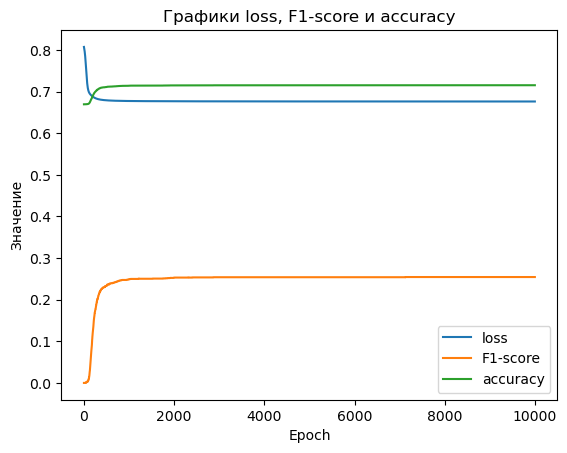

In [62]:
# построение графика loss
plt.plot(diagdf['Epoch'], diagdf['loss'], label='loss')

# построение графика F1-score
plt.plot(diagdf['Epoch'], diagdf['F1-score'], label='F1-score')

# построение графика accuracy
plt.plot(diagdf['Epoch'], diagdf['accuracy'], label='accuracy')

# добавление заголовка графика
plt.title('Графики loss, F1-score и accuracy')

# добавление подписей к осям
plt.xlabel('Epoch')
plt.ylabel('Значение')

# добавление легенды
plt.legend()

# отображение графика
plt.show()

In [63]:
pred_test=Mk1.forward(x_test.float())
pred_test_binarized = (pred_test > 0.5).float()

In [64]:
print(classification_report(y_test.to('cpu'), pred_test_binarized.to('cpu')))

              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79      3216
         1.0       0.33      0.06      0.10      1542

    accuracy                           0.66      4758
   macro avg       0.50      0.50      0.45      4758
weighted avg       0.56      0.66      0.57      4758

